In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
from IPython.display import Audio
import noisereduce as nr
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os
import librosa as lb
import sys
sys.path.append(os.path.abspath('script'))
from feature_class import features
from DSP import classify_cough
from segmentation import segment_cough, compute_SNR
import soundfile as sf
import pickle

In [6]:
loaded_model = pickle.load(open(os.path.join('models', 'cough_classifier'), 'rb'))
loaded_scaler = pickle.load(open(os.path.join('models','cough_classification_scaler'), 'rb'))

In [7]:
path_data = 'classification/other/test_001.wav'
noise_data, noise_rate = lb.load(path_data,sr=None)

The SNR of the cough signal is 4.604272544384003
The file has a 10.15\% probability of being a cough


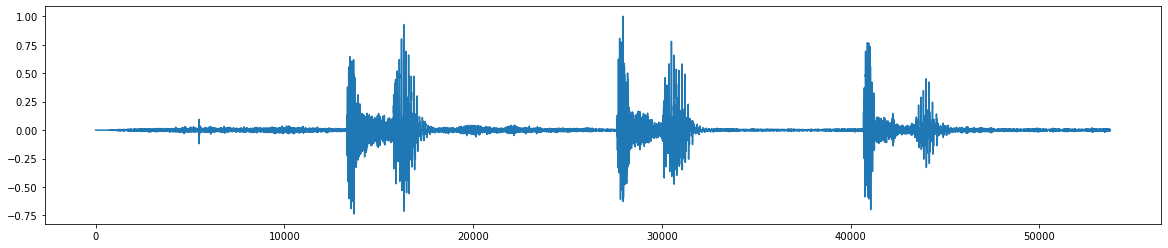

In [8]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(noise_data)

snr = compute_SNR(noise_data,noise_rate)
print("The SNR of the cough signal is {0}".format(snr))

probability = classify_cough(noise_data, noise_rate, loaded_model, loaded_scaler)
value = round(probability*100,2)
print("The file has a {0}\% probability of being a cough".format(value))
IPython.display.Audio(data=noise_data, rate=noise_rate)

The SNR of the cough signal is 0
The file has a 90.26\% probability of being a cough


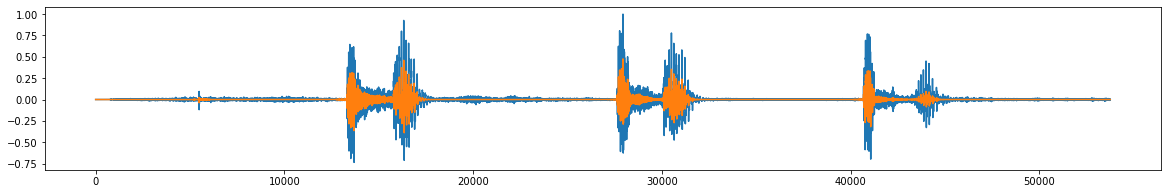

In [14]:
reduced_noise = nr.reduce_noise(y = noise_data, sr=noise_rate, thresh_n_mult_nonstationary=6,stationary=False)

fig, ax = plt.subplots(figsize=(20,3))
ax.plot(noise_data)
ax.plot(reduced_noise, alpha = 1)

snr = compute_SNR(reduced_noise,noise_rate)
print("The SNR of the cough signal is {0}".format(snr))

probability = classify_cough(reduced_noise, noise_rate, loaded_model, loaded_scaler)
value = round(probability*100,2)
print("The file has a {0}\% probability of being a cough".format(value))
IPython.display.Audio(data=reduced_noise, rate=noise_rate)

In [11]:
folder = 'dataset/Filter-Data'
types = ['other','cough']

if os.path.exists(folder)==False:
    os.mkdir(folder)
    for i in types:
        os.mkdir(os.path.join(folder,i))

In [20]:
data = 'dataset/Compare-Data/dist/wav_normalized'
prob_temp = []
for i in os.listdir(data):
    filename = os.path.join(data,i)
    wav_audio,sr = lb.load(filename, sr=None)
    j = 0
    prob_temp = [0]
    while j<20:
        j = j + 1
        audio = nr.reduce_noise(y = wav_audio, sr=sr, thresh_n_mult_nonstationary=j,stationary=False)
        probability = classify_cough(audio, sr, loaded_model, loaded_scaler)
        value = round(probability*100,2)
        prob_temp.append(value)

    thres = prob_temp.index(max(prob_temp))
    audio = nr.reduce_noise(y = wav_audio, sr=sr, thresh_n_mult_nonstationary=thres,stationary=False)
    print('='*40)
    snr_wav = compute_SNR(wav_audio,sr)
    snr_audio = compute_SNR(audio,sr)
    print("The SNR of {0} is {1} and after noise reduction is {2}".format(i,snr_wav,snr_audio))

    probability_wav = classify_cough(wav_audio, sr, loaded_model, loaded_scaler)
    value_wav = round(probability_wav*100,2)
    print("The file has a {0}\% probability of being a cough before noise reduction".format(value_wav))

    probability_audio = classify_cough(audio, sr, loaded_model, loaded_scaler)
    value_audio = round(probability_audio*100,2)
    print("The file has a {0}\% probability of being a cough after noise reduction".format(value_audio))
    
    if value_audio >= 80:
        cat = 'cough'
    else:
        cat = 'other'
    
    location = os.path.join(folder,cat,i)
    sf.write(location,data=audio,samplerate=sr)

The SNR of devel_057.wav is 10.16653060913086 and after noise reduction is 0
The file has a 93.23\% probability of being a cough before noise reduction
The file has a 99.12\% probability of being a cough after noise reduction
The SNR of devel_107.wav is 40.6449031829834 and after noise reduction is 10.755218267440796
The file has a 91.84\% probability of being a cough before noise reduction
The file has a 91.96\% probability of being a cough after noise reduction
The SNR of test_052.wav is 9.635462760925293 and after noise reduction is 0
The file has a 78.43\% probability of being a cough before noise reduction
The file has a 86.07\% probability of being a cough after noise reduction
The SNR of test_023.wav is 7.080442309379578 and after noise reduction is 0
The file has a 61.82\% probability of being a cough before noise reduction
The file has a 95.64\% probability of being a cough after noise reduction
The SNR of test_201.wav is 25.102264881134033 and after noise reduction is 67.6352

The SNR of train_248.wav is 11.686358451843262 and after noise reduction is 0
The file has a 79.95\% probability of being a cough before noise reduction
The file has a 98.8\% probability of being a cough after noise reduction
The SNR of train_116.wav is 12.043790817260742 and after noise reduction is 14.85607624053955
The file has a 89.85\% probability of being a cough before noise reduction
The file has a 93.94\% probability of being a cough after noise reduction
The SNR of devel_126.wav is 11.097015142440796 and after noise reduction is 0
The file has a 86.5\% probability of being a cough before noise reduction
The file has a 95.81\% probability of being a cough after noise reduction
The SNR of train_026.wav is 37.70590305328369 and after noise reduction is 0
The file has a 76.44\% probability of being a cough before noise reduction
The file has a 94.25\% probability of being a cough after noise reduction
The SNR of test_091.wav is 16.87528133392334 and after noise reduction is 15.20

The SNR of test_017.wav is 0 and after noise reduction is 0
The file has a 87.56\% probability of being a cough before noise reduction
The file has a 91.61\% probability of being a cough after noise reduction
The SNR of devel_045.wav is 45.630574226379395 and after noise reduction is 193.03485870361328
The file has a 92.93\% probability of being a cough before noise reduction
The file has a 98.67\% probability of being a cough after noise reduction
The SNR of test_075.wav is 15.96395492553711 and after noise reduction is 6.017048954963684
The file has a 57.03\% probability of being a cough before noise reduction
The file has a 88.01\% probability of being a cough after noise reduction
The SNR of train_137.wav is 12.43112325668335 and after noise reduction is 13.270550966262817
The file has a 91.36\% probability of being a cough before noise reduction
The file has a 98.23\% probability of being a cough after noise reduction
The SNR of train_183.wav is 36.35104179382324 and after noise r

The SNR of train_045.wav is 9.000034928321838 and after noise reduction is 0
The file has a 83.31\% probability of being a cough before noise reduction
The file has a 85.3\% probability of being a cough after noise reduction
The SNR of devel_129.wav is 35.15190124511719 and after noise reduction is 88.73963356018066
The file has a 88.62\% probability of being a cough before noise reduction
The file has a 95.64\% probability of being a cough after noise reduction
The SNR of test_060.wav is 14.2234468460083 and after noise reduction is 0
The file has a 30.47\% probability of being a cough before noise reduction
The file has a 72.76\% probability of being a cough after noise reduction
The SNR of train_016.wav is 9.592692255973816 and after noise reduction is 9.526363611221313
The file has a 28.69\% probability of being a cough before noise reduction
The file has a 81.58\% probability of being a cough after noise reduction
The SNR of train_147.wav is 9.386793375015259 and after noise reduc

The file has a 97.14\% probability of being a cough after noise reduction
The SNR of test_192.wav is 14.71888542175293 and after noise reduction is 4.623437523841858
The file has a 8.74\% probability of being a cough before noise reduction
The file has a 66.18\% probability of being a cough after noise reduction
The SNR of devel_197.wav is 7.4349164962768555 and after noise reduction is 8.98797869682312
The file has a 56.44\% probability of being a cough before noise reduction
The file has a 77.06\% probability of being a cough after noise reduction
The SNR of train_189.wav is 6.667054891586304 and after noise reduction is 0
The file has a 54.56\% probability of being a cough before noise reduction
The file has a 91.51\% probability of being a cough after noise reduction
The SNR of train_100.wav is 9.064565896987915 and after noise reduction is 0
The file has a 66.88\% probability of being a cough before noise reduction
The file has a 98.61\% probability of being a cough after noise re

The SNR of train_104.wav is 11.727849245071411 and after noise reduction is 9.758555889129639
The file has a 48.92\% probability of being a cough before noise reduction
The file has a 93.24\% probability of being a cough after noise reduction
The SNR of devel_229.wav is 9.379767179489136 and after noise reduction is 0
The file has a 95.07\% probability of being a cough before noise reduction
The file has a 96.27\% probability of being a cough after noise reduction
The SNR of train_078.wav is 10.040450096130371 and after noise reduction is 0
The file has a 23.77\% probability of being a cough before noise reduction
The file has a 91.45\% probability of being a cough after noise reduction
The SNR of train_244.wav is 34.94204044342041 and after noise reduction is 55.58672904968262
The file has a 88.38\% probability of being a cough before noise reduction
The file has a 97.83\% probability of being a cough after noise reduction
The SNR of devel_117.wav is 22.42772340774536 and after noise 

The file has a 92.4\% probability of being a cough after noise reduction
The SNR of test_134.wav is 37.93269872665405 and after noise reduction is 10.438413619995117
The file has a 95.05\% probability of being a cough before noise reduction
The file has a 97.06\% probability of being a cough after noise reduction
The SNR of train_156.wav is 15.609880685806274 and after noise reduction is 7.3463135957717896
The file has a 4.51\% probability of being a cough before noise reduction
The file has a 53.83\% probability of being a cough after noise reduction
The SNR of train_230.wav is 4.118559658527374 and after noise reduction is 10.47156572341919
The file has a 67.96\% probability of being a cough before noise reduction
The file has a 88.74\% probability of being a cough after noise reduction
The SNR of devel_142.wav is 0 and after noise reduction is 0
The file has a 9.05\% probability of being a cough before noise reduction
The file has a 61.17\% probability of being a cough after noise r

The file has a 94.04\% probability of being a cough after noise reduction
The SNR of devel_098.wav is 6.041097044944763 and after noise reduction is 6.422507166862488
The file has a 23.56\% probability of being a cough before noise reduction
The file has a 79.97\% probability of being a cough after noise reduction
The SNR of test_007.wav is 18.290826082229614 and after noise reduction is 22.691166400909424
The file has a 30.71\% probability of being a cough before noise reduction
The file has a 78.62\% probability of being a cough after noise reduction
The SNR of devel_052.wav is 9.590792655944824 and after noise reduction is 10.541931390762329
The file has a 79.82\% probability of being a cough before noise reduction
The file has a 91.95\% probability of being a cough after noise reduction
The SNR of train_047.wav is 14.216910600662231 and after noise reduction is 0
The file has a 71.04\% probability of being a cough before noise reduction
The file has a 94.6\% probability of being a 

The file has a 96.95\% probability of being a cough after noise reduction
The SNR of train_132.wav is 13.960491418838501 and after noise reduction is 14.088854789733887
The file has a 73.97\% probability of being a cough before noise reduction
The file has a 97.97\% probability of being a cough after noise reduction
The SNR of train_273.wav is 6.534788608551025 and after noise reduction is 0
The file has a 72.86\% probability of being a cough before noise reduction
The file has a 91.43\% probability of being a cough after noise reduction
The SNR of train_119.wav is 19.43555474281311 and after noise reduction is 14.009361267089844
The file has a 83.21\% probability of being a cough before noise reduction
The file has a 86.9\% probability of being a cough after noise reduction
The SNR of devel_134.wav is 38.96029233932495 and after noise reduction is 52.053160667419434
The file has a 94.13\% probability of being a cough before noise reduction
The file has a 98.95\% probability of being a

The file has a 92.16\% probability of being a cough after noise reduction
The SNR of train_229.wav is 38.04048776626587 and after noise reduction is 82.76281356811523
The file has a 97.02\% probability of being a cough before noise reduction
The file has a 98.32\% probability of being a cough after noise reduction
The SNR of devel_075.wav is 9.747064113616943 and after noise reduction is 7.3974645137786865
The file has a 5.63\% probability of being a cough before noise reduction
The file has a 69.98\% probability of being a cough after noise reduction
The SNR of train_211.wav is 10.020530223846436 and after noise reduction is 0
The file has a 60.84\% probability of being a cough before noise reduction
The file has a 89.55\% probability of being a cough after noise reduction
The SNR of train_152.wav is 15.730812549591064 and after noise reduction is 8.927308917045593
The file has a 67.95\% probability of being a cough before noise reduction
The file has a 92.94\% probability of being a 

The file has a 99.18\% probability of being a cough after noise reduction
The SNR of train_181.wav is 31.458048820495605 and after noise reduction is 68.0647087097168
The file has a 56.67\% probability of being a cough before noise reduction
The file has a 95.15\% probability of being a cough after noise reduction
The SNR of devel_186.wav is 15.207022428512573 and after noise reduction is 12.56821870803833
The file has a 69.89\% probability of being a cough before noise reduction
The file has a 93.8\% probability of being a cough after noise reduction
The SNR of devel_016.wav is 26.86638355255127 and after noise reduction is 32.36236333847046
The file has a 90.92\% probability of being a cough before noise reduction
The file has a 97.91\% probability of being a cough after noise reduction
The SNR of devel_127.wav is 7.740157246589661 and after noise reduction is 9.172224998474121
The file has a 47.69\% probability of being a cough before noise reduction
The file has a 94.24\% probabili

The SNR of test_182.wav is 0 and after noise reduction is 0
The file has a 41.51\% probability of being a cough before noise reduction
The file has a 87.22\% probability of being a cough after noise reduction
The SNR of train_061.wav is 35.38985252380371 and after noise reduction is 8.382711410522461
The file has a 96.3\% probability of being a cough before noise reduction
The file has a 99.12\% probability of being a cough after noise reduction
The SNR of train_241.wav is 9.0745210647583 and after noise reduction is 0
The file has a 28.69\% probability of being a cough before noise reduction
The file has a 87.11\% probability of being a cough after noise reduction
The SNR of devel_164.wav is 26.23530387878418 and after noise reduction is 49.645752906799316
The file has a 56.4\% probability of being a cough before noise reduction
The file has a 92.73\% probability of being a cough after noise reduction
The SNR of train_170.wav is 0 and after noise reduction is 0
The file has a 54.85\% 

The SNR of devel_074.wav is 15.710638761520386 and after noise reduction is 11.514924764633179
The file has a 75.89\% probability of being a cough before noise reduction
The file has a 97.96\% probability of being a cough after noise reduction
The SNR of train_034.wav is 8.76280426979065 and after noise reduction is 0
The file has a 86.95\% probability of being a cough before noise reduction
The file has a 98.87\% probability of being a cough after noise reduction
The SNR of train_102.wav is 13.557777404785156 and after noise reduction is 15.959330797195435
The file has a 67.32\% probability of being a cough before noise reduction
The file has a 81.69\% probability of being a cough after noise reduction
The SNR of test_016.wav is 50.210771560668945 and after noise reduction is 16.654698848724365
The file has a 97.85\% probability of being a cough before noise reduction
The file has a 95.75\% probability of being a cough after noise reduction
The SNR of train_020.wav is 23.3563113212585

The SNR of train_135.wav is 17.48250722885132 and after noise reduction is 8.152409791946411
The file has a 91.25\% probability of being a cough before noise reduction
The file has a 89.94\% probability of being a cough after noise reduction
The SNR of test_093.wav is 13.269619941711426 and after noise reduction is 0
The file has a 31.36\% probability of being a cough before noise reduction
The file has a 72.36\% probability of being a cough after noise reduction
The SNR of devel_177.wav is 13.843272924423218 and after noise reduction is 14.46165919303894
The file has a 79.52\% probability of being a cough before noise reduction
The file has a 80.93\% probability of being a cough after noise reduction
The SNR of train_125.wav is 22.57896900177002 and after noise reduction is 44.57589149475098
The file has a 20.14\% probability of being a cough before noise reduction
The file has a 87.99\% probability of being a cough after noise reduction
The SNR of train_215.wav is 17.70542025566101 a

The file has a 97.33\% probability of being a cough after noise reduction
The SNR of devel_038.wav is 13.008668422698975 and after noise reduction is 13.361877202987671
The file has a 66.16\% probability of being a cough before noise reduction
The file has a 79.37\% probability of being a cough after noise reduction
The SNR of devel_054.wav is 9.516627788543701 and after noise reduction is 9.393092393875122
The file has a 97.01\% probability of being a cough before noise reduction
The file has a 98.94\% probability of being a cough after noise reduction
The SNR of devel_108.wav is 22.661335468292236 and after noise reduction is 0
The file has a 53.13\% probability of being a cough before noise reduction
The file has a 99.43\% probability of being a cough after noise reduction
The SNR of devel_076.wav is 26.319215297698975 and after noise reduction is 32.653563022613525
The file has a 89.82\% probability of being a cough before noise reduction
The file has a 97.41\% probability of being

The file has a 98.09\% probability of being a cough after noise reduction
The SNR of devel_069.wav is 0 and after noise reduction is 0
The file has a 82.78\% probability of being a cough before noise reduction
The file has a 97.68\% probability of being a cough after noise reduction
The SNR of train_109.wav is 21.04541301727295 and after noise reduction is 46.97928428649902
The file has a 51.64\% probability of being a cough before noise reduction
The file has a 74.71\% probability of being a cough after noise reduction
The SNR of test_095.wav is 26.18220567703247 and after noise reduction is 8.373282551765442
The file has a 54.93\% probability of being a cough before noise reduction
The file has a 82.04\% probability of being a cough after noise reduction
The SNR of devel_097.wav is 24.990038871765137 and after noise reduction is 14.71602201461792
The file has a 82.52\% probability of being a cough before noise reduction
The file has a 81.93\% probability of being a cough after noise 

The file has a 84.92\% probability of being a cough after noise reduction
The SNR of train_234.wav is 11.216288805007935 and after noise reduction is 8.649836778640747
The file has a 61.0\% probability of being a cough before noise reduction
The file has a 96.25\% probability of being a cough after noise reduction
The SNR of devel_078.wav is 33.92899751663208 and after noise reduction is 59.99842166900635
The file has a 42.9\% probability of being a cough before noise reduction
The file has a 98.82\% probability of being a cough after noise reduction
The SNR of devel_010.wav is 1.1988765746355057 and after noise reduction is 0
The file has a 16.47\% probability of being a cough before noise reduction
The file has a 54.31\% probability of being a cough after noise reduction
The SNR of devel_066.wav is 10.383785963058472 and after noise reduction is 9.351189136505127
The file has a 44.43\% probability of being a cough before noise reduction
The file has a 96.35\% probability of being a c

The file has a 87.98\% probability of being a cough after noise reduction
The SNR of devel_182.wav is 27.273197174072266 and after noise reduction is 3.81540983915329
The file has a 98.06\% probability of being a cough before noise reduction
The file has a 97.75\% probability of being a cough after noise reduction
The SNR of train_019.wav is 18.85151743888855 and after noise reduction is 0
The file has a 79.87\% probability of being a cough before noise reduction
The file has a 92.76\% probability of being a cough after noise reduction
The SNR of test_036.wav is 8.555396795272827 and after noise reduction is 10.08352518081665
The file has a 46.34\% probability of being a cough before noise reduction
The file has a 91.48\% probability of being a cough after noise reduction
The SNR of test_159.wav is 9.887660145759583 and after noise reduction is 10.637928247451782
The file has a 89.92\% probability of being a cough before noise reduction
The file has a 94.26\% probability of being a cou

The SNR of devel_213.wav is 6.59505307674408 and after noise reduction is 6.552736759185791
The file has a 72.49\% probability of being a cough before noise reduction
The file has a 97.37\% probability of being a cough after noise reduction
The SNR of devel_141.wav is 18.566710948944092 and after noise reduction is 0
The file has a 24.59\% probability of being a cough before noise reduction
The file has a 76.23\% probability of being a cough after noise reduction
The SNR of train_232.wav is 32.61595964431763 and after noise reduction is 86.4791488647461
The file has a 10.13\% probability of being a cough before noise reduction
The file has a 75.47\% probability of being a cough after noise reduction
The SNR of test_155.wav is 5.838256478309631 and after noise reduction is 0
The file has a 68.41\% probability of being a cough before noise reduction
The file has a 74.48\% probability of being a cough after noise reduction
The SNR of devel_102.wav is 2.2654691338539124 and after noise red

The file has a 98.82\% probability of being a cough after noise reduction
The SNR of train_252.wav is 0 and after noise reduction is 0
The file has a 67.97\% probability of being a cough before noise reduction
The file has a 97.88\% probability of being a cough after noise reduction
The SNR of train_196.wav is 14.365054368972778 and after noise reduction is 13.000541925430298
The file has a 97.38\% probability of being a cough before noise reduction
The file has a 93.54\% probability of being a cough after noise reduction
The SNR of test_196.wav is 33.38162422180176 and after noise reduction is 64.96507167816162
The file has a 92.29\% probability of being a cough before noise reduction
The file has a 98.49\% probability of being a cough after noise reduction
The SNR of devel_109.wav is 6.80644154548645 and after noise reduction is 7.099367380142212
The file has a 79.15\% probability of being a cough before noise reduction
The file has a 85.03\% probability of being a cough after noise 

The file has a 97.55\% probability of being a cough after noise reduction
The SNR of train_111.wav is 28.52902889251709 and after noise reduction is 10.006420612335205
The file has a 23.07\% probability of being a cough before noise reduction
The file has a 76.37\% probability of being a cough after noise reduction
The SNR of devel_019.wav is 46.27981662750244 and after noise reduction is 86.58491134643555
The file has a 89.83\% probability of being a cough before noise reduction
The file has a 86.25\% probability of being a cough after noise reduction
The SNR of devel_050.wav is 0 and after noise reduction is 0
The file has a 1.72\% probability of being a cough before noise reduction
The file has a 60.3\% probability of being a cough after noise reduction
The SNR of train_158.wav is 13.23190689086914 and after noise reduction is 0
The file has a 2.69\% probability of being a cough before noise reduction
The file has a 21.11\% probability of being a cough after noise reduction
The SNR 

The SNR of devel_092.wav is 11.45763635635376 and after noise reduction is 13.272802829742432
The file has a 90.32\% probability of being a cough before noise reduction
The file has a 99.58\% probability of being a cough after noise reduction
The SNR of test_090.wav is 10.747331380844116 and after noise reduction is 10.266885757446289
The file has a 37.1\% probability of being a cough before noise reduction
The file has a 94.69\% probability of being a cough after noise reduction
The SNR of test_035.wav is 42.236642837524414 and after noise reduction is 13.686593770980835
The file has a 93.45\% probability of being a cough before noise reduction
The file has a 95.59\% probability of being a cough after noise reduction
The SNR of test_160.wav is 13.52939486503601 and after noise reduction is 9.828047752380371
The file has a 85.1\% probability of being a cough before noise reduction
The file has a 98.64\% probability of being a cough after noise reduction
The SNR of devel_181.wav is 11.8

The file has a 94.95\% probability of being a cough after noise reduction
The SNR of test_168.wav is 25.626835823059082 and after noise reduction is 10.488932132720947
The file has a 49.18\% probability of being a cough before noise reduction
The file has a 87.43\% probability of being a cough after noise reduction
The SNR of test_046.wav is 25.737667083740234 and after noise reduction is 36.45665884017944
The file has a 90.59\% probability of being a cough before noise reduction
The file has a 99.47\% probability of being a cough after noise reduction
The SNR of devel_173.wav is 13.774354457855225 and after noise reduction is 0
The file has a 47.12\% probability of being a cough before noise reduction
The file has a 99.72\% probability of being a cough after noise reduction
The SNR of devel_176.wav is 30.600478649139404 and after noise reduction is 40.85906982421875
The file has a 83.48\% probability of being a cough before noise reduction
The file has a 94.52\% probability of being a

The SNR of test_073.wav is 19.223676919937134 and after noise reduction is 0
The file has a 11.89\% probability of being a cough before noise reduction
The file has a 86.5\% probability of being a cough after noise reduction
The SNR of train_205.wav is 22.994625568389893 and after noise reduction is 24.996285438537598
The file has a 77.55\% probability of being a cough before noise reduction
The file has a 99.24\% probability of being a cough after noise reduction
The SNR of train_151.wav is 29.793596267700195 and after noise reduction is 0
The file has a 55.25\% probability of being a cough before noise reduction
The file has a 98.85\% probability of being a cough after noise reduction
The SNR of devel_185.wav is 14.174420833587646 and after noise reduction is 5.507909059524536
The file has a 43.28\% probability of being a cough before noise reduction
The file has a 80.11\% probability of being a cough after noise reduction
The SNR of devel_220.wav is 13.15771222114563 and after noise

The SNR of test_069.wav is 8.585585355758667 and after noise reduction is 9.580126404762268
The file has a 48.93\% probability of being a cough before noise reduction
The file has a 83.5\% probability of being a cough after noise reduction
The SNR of test_172.wav is 10.117566585540771 and after noise reduction is 0
The file has a 42.25\% probability of being a cough before noise reduction
The file has a 86.05\% probability of being a cough after noise reduction
The SNR of devel_029.wav is 11.872000694274902 and after noise reduction is 0
The file has a 22.16\% probability of being a cough before noise reduction
The file has a 84.94\% probability of being a cough after noise reduction
The SNR of devel_059.wav is 8.941759467124939 and after noise reduction is 10.457324981689453
The file has a 38.19\% probability of being a cough before noise reduction
The file has a 85.89\% probability of being a cough after noise reduction
The SNR of devel_122.wav is 10.144734382629395 and after noise r

In [21]:
folder = 'dataset/SNR-Data'
types = ['other','cough']

if os.path.exists(folder)==False:
    os.mkdir(folder)
    for i in types:
        os.mkdir(os.path.join(folder,i))

In [22]:
data = 'dataset/Compare-Data/dist/wav_normalized'
prob_temp = []
for i in os.listdir(data):
    filename = os.path.join(data,i)
    wav_audio,sr = lb.load(filename, sr=None)
    j = 0
    prob_temp = [0]
    while j<20:
        j = j + 1
        audio = nr.reduce_noise(y = wav_audio, sr=sr, thresh_n_mult_nonstationary=j,stationary=False)
        snr_audio = compute_SNR(audio,sr)
        prob_temp.append(snr_audio)

    thres = prob_temp.index(max(prob_temp))
    audio = nr.reduce_noise(y = wav_audio, sr=sr, thresh_n_mult_nonstationary=thres,stationary=False)
    print('='*40)
    snr_wav = compute_SNR(wav_audio,sr)
    snr_audio = compute_SNR(audio,sr)
    print("The SNR of {0} is {1} and after noise reduction is {2}".format(i,snr_wav,snr_audio))

    probability_wav = classify_cough(wav_audio, sr, loaded_model, loaded_scaler)
    value_wav = round(probability_wav*100,2)
    print("The file has a {0}\% probability of being a cough before noise reduction".format(value_wav))

    probability_audio = classify_cough(audio, sr, loaded_model, loaded_scaler)
    value_audio = round(probability_audio*100,2)
    print("The file has a {0}\% probability of being a cough after noise reduction".format(value_audio))
    
    if value_audio >= 80:
        cat = 'cough'
    else:
        cat = 'other'
    
    location = os.path.join(folder,cat,i)
    sf.write(location,data=audio,samplerate=sr)

The SNR of devel_057.wav is 10.16653060913086 and after noise reduction is -0.5830319598317146
The file has a 93.23\% probability of being a cough before noise reduction
The file has a 97.95\% probability of being a cough after noise reduction
The SNR of devel_107.wav is 40.6449031829834 and after noise reduction is 12.254533767700195
The file has a 91.84\% probability of being a cough before noise reduction
The file has a 91.8\% probability of being a cough after noise reduction
The SNR of test_052.wav is 9.635462760925293 and after noise reduction is 10.095212459564209
The file has a 78.43\% probability of being a cough before noise reduction
The file has a 58.43\% probability of being a cough after noise reduction
The SNR of test_023.wav is 7.080442309379578 and after noise reduction is 7.228996753692627
The file has a 61.82\% probability of being a cough before noise reduction
The file has a 89.79\% probability of being a cough after noise reduction
The SNR of test_201.wav is 25.10

The file has a 98.43\% probability of being a cough after noise reduction
The SNR of train_248.wav is 11.686358451843262 and after noise reduction is 12.648371458053589
The file has a 79.95\% probability of being a cough before noise reduction
The file has a 97.4\% probability of being a cough after noise reduction
The SNR of train_116.wav is 12.043790817260742 and after noise reduction is 18.450863361358643
The file has a 89.85\% probability of being a cough before noise reduction
The file has a 88.61\% probability of being a cough after noise reduction
The SNR of devel_126.wav is 11.097015142440796 and after noise reduction is 11.457737684249878
The file has a 86.5\% probability of being a cough before noise reduction
The file has a 86.83\% probability of being a cough after noise reduction
The SNR of train_026.wav is 37.70590305328369 and after noise reduction is 66.09201431274414
The file has a 76.44\% probability of being a cough before noise reduction
The file has a 75.67\% proba

The SNR of devel_055.wav is 9.614035487174988 and after noise reduction is 12.513680458068848
The file has a 73.27\% probability of being a cough before noise reduction
The file has a 86.25\% probability of being a cough after noise reduction
The SNR of test_017.wav is 0 and after noise reduction is 0
The file has a 87.56\% probability of being a cough before noise reduction
The file has a 90.95\% probability of being a cough after noise reduction
The SNR of devel_045.wav is 45.630574226379395 and after noise reduction is 313.2344055175781
The file has a 92.93\% probability of being a cough before noise reduction
The file has a 98.23\% probability of being a cough after noise reduction
The SNR of test_075.wav is 15.96395492553711 and after noise reduction is 37.500152587890625
The file has a 57.03\% probability of being a cough before noise reduction
The file has a 73.24\% probability of being a cough after noise reduction
The SNR of train_137.wav is 12.43112325668335 and after noise r

The file has a 51.77\% probability of being a cough after noise reduction
The SNR of devel_041.wav is 7.812815308570862 and after noise reduction is 8.77097487449646
The file has a 82.44\% probability of being a cough before noise reduction
The file has a 94.85\% probability of being a cough after noise reduction
The SNR of train_045.wav is 9.000034928321838 and after noise reduction is 11.06982946395874
The file has a 83.31\% probability of being a cough before noise reduction
The file has a 76.01\% probability of being a cough after noise reduction
The SNR of devel_129.wav is 35.15190124511719 and after noise reduction is 332.27745056152344
The file has a 88.62\% probability of being a cough before noise reduction
The file has a 93.35\% probability of being a cough after noise reduction
The SNR of test_060.wav is 14.2234468460083 and after noise reduction is 17.953920364379883
The file has a 30.47\% probability of being a cough before noise reduction
The file has a 56.35\% probabilit

The SNR of test_019.wav is 27.872402667999268 and after noise reduction is 46.06555461883545
The file has a 90.16\% probability of being a cough before noise reduction
The file has a 76.38\% probability of being a cough after noise reduction
The SNR of test_170.wav is 8.502538800239563 and after noise reduction is 8.856147527694702
The file has a 95.18\% probability of being a cough before noise reduction
The file has a 97.14\% probability of being a cough after noise reduction
The SNR of test_192.wav is 14.71888542175293 and after noise reduction is 15.722657442092896
The file has a 8.74\% probability of being a cough before noise reduction
The file has a 41.75\% probability of being a cough after noise reduction
The SNR of devel_197.wav is 7.4349164962768555 and after noise reduction is 13.927252292633057
The file has a 56.44\% probability of being a cough before noise reduction
The file has a 76.84\% probability of being a cough after noise reduction
The SNR of train_189.wav is 6.66

The file has a 57.37\% probability of being a cough after noise reduction
The SNR of devel_030.wav is 7.1145713329315186 and after noise reduction is 7.337212562561035
The file has a 91.85\% probability of being a cough before noise reduction
The file has a 96.26\% probability of being a cough after noise reduction
The SNR of train_163.wav is 10.405724048614502 and after noise reduction is 11.071059703826904
The file has a 10.29\% probability of being a cough before noise reduction
The file has a 77.92\% probability of being a cough after noise reduction
The SNR of train_104.wav is 11.727849245071411 and after noise reduction is 9.758555889129639
The file has a 48.92\% probability of being a cough before noise reduction
The file has a 93.24\% probability of being a cough after noise reduction
The SNR of devel_229.wav is 9.379767179489136 and after noise reduction is 9.907615184783936
The file has a 95.07\% probability of being a cough before noise reduction
The file has a 89.89\% proba

The SNR of devel_153.wav is 0 and after noise reduction is 0
The file has a 47.69\% probability of being a cough before noise reduction
The file has a 74.67\% probability of being a cough after noise reduction
The SNR of devel_067.wav is 11.080996990203857 and after noise reduction is 11.635268926620483
The file has a 66.03\% probability of being a cough before noise reduction
The file has a 92.97\% probability of being a cough after noise reduction
The SNR of train_118.wav is 17.780771255493164 and after noise reduction is 52.229552268981934
The file has a 17.89\% probability of being a cough before noise reduction
The file has a 92.4\% probability of being a cough after noise reduction
The SNR of test_134.wav is 37.93269872665405 and after noise reduction is 10.438413619995117
The file has a 95.05\% probability of being a cough before noise reduction
The file has a 97.06\% probability of being a cough after noise reduction
The SNR of train_156.wav is 15.609880685806274 and after nois

The file has a 96.98\% probability of being a cough after noise reduction
The SNR of test_199.wav is 15.260229110717773 and after noise reduction is 14.637027978897095
The file has a 94.17\% probability of being a cough before noise reduction
The file has a 94.78\% probability of being a cough after noise reduction
The SNR of devel_211.wav is 27.873685359954834 and after noise reduction is 115.06901741027832
The file has a 91.87\% probability of being a cough before noise reduction
The file has a 96.34\% probability of being a cough after noise reduction
The SNR of devel_046.wav is 11.898185014724731 and after noise reduction is 15.2412748336792
The file has a 83.15\% probability of being a cough before noise reduction
The file has a 30.16\% probability of being a cough after noise reduction
The SNR of devel_098.wav is 6.041097044944763 and after noise reduction is 7.840375900268555
The file has a 23.56\% probability of being a cough before noise reduction
The file has a 79.63\% probab

The SNR of devel_204.wav is 33.83232593536377 and after noise reduction is 29.86140727996826
The file has a 97.52\% probability of being a cough before noise reduction
The file has a 99.29\% probability of being a cough after noise reduction
The SNR of devel_056.wav is 9.522596597671509 and after noise reduction is 15.091022253036499
The file has a 24.22\% probability of being a cough before noise reduction
The file has a 52.57\% probability of being a cough after noise reduction
The SNR of train_028.wav is 4.340356886386871 and after noise reduction is 3.7846386432647705
The file has a 1.34\% probability of being a cough before noise reduction
The file has a 20.9\% probability of being a cough after noise reduction
The SNR of test_111.wav is 8.859376907348633 and after noise reduction is 9.750422835350037
The file has a 83.35\% probability of being a cough before noise reduction
The file has a 96.95\% probability of being a cough after noise reduction
The SNR of train_132.wav is 13.96

The file has a 90.1\% probability of being a cough after noise reduction
The SNR of devel_159.wav is 26.632814407348633 and after noise reduction is 34.95696783065796
The file has a 41.3\% probability of being a cough before noise reduction
The file has a 92.45\% probability of being a cough after noise reduction
The SNR of train_182.wav is 14.793920516967773 and after noise reduction is 7.731802463531494
The file has a 79.19\% probability of being a cough before noise reduction
The file has a 84.5\% probability of being a cough after noise reduction
The SNR of devel_203.wav is 13.545780181884766 and after noise reduction is 14.935039281845093
The file has a 88.09\% probability of being a cough before noise reduction
The file has a 88.76\% probability of being a cough after noise reduction
The SNR of devel_032.wav is 0 and after noise reduction is 0
The file has a 20.93\% probability of being a cough before noise reduction
The file has a 59.64\% probability of being a cough after noise

The SNR of devel_175.wav is 31.210007667541504 and after noise reduction is 59.04193878173828
The file has a 56.57\% probability of being a cough before noise reduction
The file has a 92.44\% probability of being a cough after noise reduction
The SNR of train_270.wav is 5.237962007522583 and after noise reduction is 5.845917463302612
The file has a 88.75\% probability of being a cough before noise reduction
The file has a 64.58\% probability of being a cough after noise reduction
The SNR of train_024.wav is 1.1698602885007858 and after noise reduction is 1.2601475417613983
The file has a 34.96\% probability of being a cough before noise reduction
The file has a 49.54\% probability of being a cough after noise reduction
The SNR of test_148.wav is 4.188680052757263 and after noise reduction is 4.48980987071991
The file has a 9.89\% probability of being a cough before noise reduction
The file has a 76.99\% probability of being a cough after noise reduction
The SNR of devel_099.wav is 13.3

The SNR of test_096.wav is 29.59221601486206 and after noise reduction is 11.910696029663086
The file has a 67.89\% probability of being a cough before noise reduction
The file has a 88.4\% probability of being a cough after noise reduction
The SNR of train_245.wav is 13.160817623138428 and after noise reduction is 9.852310419082642
The file has a 95.84\% probability of being a cough before noise reduction
The file has a 97.48\% probability of being a cough after noise reduction
The SNR of train_138.wav is 20.44764995574951 and after noise reduction is 14.901903867721558
The file has a 72.52\% probability of being a cough before noise reduction
The file has a 83.27\% probability of being a cough after noise reduction
The SNR of test_141.wav is 21.27925395965576 and after noise reduction is 24.998483657836914
The file has a 86.02\% probability of being a cough before noise reduction
The file has a 92.78\% probability of being a cough after noise reduction
The SNR of devel_160.wav is 15.

The SNR of test_088.wav is 8.66652250289917 and after noise reduction is 10.511863231658936
The file has a 16.07\% probability of being a cough before noise reduction
The file has a 75.26\% probability of being a cough after noise reduction
The SNR of devel_158.wav is 5.321287512779236 and after noise reduction is 4.8376259207725525
The file has a 17.14\% probability of being a cough before noise reduction
The file has a 69.19\% probability of being a cough after noise reduction
The SNR of test_059.wav is 10.232055187225342 and after noise reduction is 13.34912657737732
The file has a 64.97\% probability of being a cough before noise reduction
The file has a 56.5\% probability of being a cough after noise reduction
The SNR of devel_226.wav is 6.539257168769836 and after noise reduction is 4.448275864124298
The file has a 30.12\% probability of being a cough before noise reduction
The file has a 92.23\% probability of being a cough after noise reduction
The SNR of train_079.wav is 0 and

The SNR of devel_161.wav is 15.094767808914185 and after noise reduction is 19.40792679786682
The file has a 90.38\% probability of being a cough before noise reduction
The file has a 61.24\% probability of being a cough after noise reduction
The SNR of test_063.wav is 37.1555233001709 and after noise reduction is 359.10945892333984
The file has a 96.15\% probability of being a cough before noise reduction
The file has a 97.27\% probability of being a cough after noise reduction
The SNR of train_217.wav is 25.461838245391846 and after noise reduction is 36.93258047103882
The file has a 18.13\% probability of being a cough before noise reduction
The file has a 70.89\% probability of being a cough after noise reduction
The SNR of devel_009.wav is 27.213070392608643 and after noise reduction is 50.973267555236816
The file has a 86.37\% probability of being a cough before noise reduction
The file has a 88.85\% probability of being a cough after noise reduction
The SNR of train_185.wav is 1

The file has a 58.65\% probability of being a cough after noise reduction
The SNR of train_004.wav is 33.792662620544434 and after noise reduction is 351.49166107177734
The file has a 91.45\% probability of being a cough before noise reduction
The file has a 97.14\% probability of being a cough after noise reduction
The SNR of test_026.wav is 11.477494239807129 and after noise reduction is 12.645056247711182
The file has a 62.48\% probability of being a cough before noise reduction
The file has a 87.94\% probability of being a cough after noise reduction
The SNR of train_199.wav is 14.877016544342041 and after noise reduction is 25.865232944488525
The file has a 9.66\% probability of being a cough before noise reduction
The file has a 23.1\% probability of being a cough after noise reduction
The SNR of devel_101.wav is 13.621487617492676 and after noise reduction is 17.08791971206665
The file has a 75.54\% probability of being a cough before noise reduction
The file has a 43.75\% proba

The SNR of test_080.wav is 23.1062650680542 and after noise reduction is 15.052505731582642
The file has a 44.72\% probability of being a cough before noise reduction
The file has a 76.0\% probability of being a cough after noise reduction
The SNR of test_130.wav is 7.406225204467773 and after noise reduction is 7.652867436408997
The file has a 19.19\% probability of being a cough before noise reduction
The file has a 53.91\% probability of being a cough after noise reduction
The SNR of test_126.wav is 9.061623811721802 and after noise reduction is 9.936754703521729
The file has a 20.86\% probability of being a cough before noise reduction
The file has a 60.41\% probability of being a cough after noise reduction
The SNR of test_089.wav is 7.523940801620483 and after noise reduction is 6.133054494857788
The file has a 19.95\% probability of being a cough before noise reduction
The file has a 41.88\% probability of being a cough after noise reduction
The SNR of test_084.wav is 16.0452759

The SNR of devel_081.wav is 34.16987895965576 and after noise reduction is 97.8836441040039
The file has a 89.66\% probability of being a cough before noise reduction
The file has a 97.45\% probability of being a cough after noise reduction
The SNR of devel_147.wav is 5.221112966537476 and after noise reduction is 5.1658594608306885
The file has a 66.28\% probability of being a cough before noise reduction
The file has a 89.46\% probability of being a cough after noise reduction
The SNR of test_169.wav is 28.463456630706787 and after noise reduction is 50.36416053771973
The file has a 34.26\% probability of being a cough before noise reduction
The file has a 98.78\% probability of being a cough after noise reduction
The SNR of devel_051.wav is 18.527719974517822 and after noise reduction is 21.351163387298584
The file has a 83.36\% probability of being a cough before noise reduction
The file has a 94.36\% probability of being a cough after noise reduction
The SNR of test_176.wav is 27.

The SNR of train_066.wav is 13.722158670425415 and after noise reduction is 18.740403652191162
The file has a 94.7\% probability of being a cough before noise reduction
The file has a 99.54\% probability of being a cough after noise reduction
The SNR of train_141.wav is 15.846109390258789 and after noise reduction is 9.612083435058594
The file has a 82.28\% probability of being a cough before noise reduction
The file has a 89.6\% probability of being a cough after noise reduction
The SNR of devel_031.wav is 10.524231195449829 and after noise reduction is 7.491720914840698
The file has a 67.12\% probability of being a cough before noise reduction
The file has a 88.73\% probability of being a cough after noise reduction
The SNR of test_164.wav is 13.00572395324707 and after noise reduction is 10.478942394256592
The file has a 28.91\% probability of being a cough before noise reduction
The file has a 54.68\% probability of being a cough after noise reduction
The SNR of devel_079.wav is 10

The SNR of devel_172.wav is 23.596961498260498 and after noise reduction is 11.688828468322754
The file has a 53.73\% probability of being a cough before noise reduction
The file has a 80.87\% probability of being a cough after noise reduction
The SNR of devel_209.wav is 11.308367252349854 and after noise reduction is 12.559930086135864
The file has a 89.91\% probability of being a cough before noise reduction
The file has a 73.93\% probability of being a cough after noise reduction
The SNR of train_237.wav is 38.684375286102295 and after noise reduction is 57.40780830383301
The file has a 71.54\% probability of being a cough before noise reduction
The file has a 77.58\% probability of being a cough after noise reduction
The SNR of devel_156.wav is 11.396331787109375 and after noise reduction is 11.288659572601318
The file has a 15.54\% probability of being a cough before noise reduction
The file has a 68.9\% probability of being a cough after noise reduction
The SNR of devel_111.wav i

The SNR of test_044.wav is 37.821152210235596 and after noise reduction is 49.5878267288208
The file has a 99.05\% probability of being a cough before noise reduction
The file has a 99.19\% probability of being a cough after noise reduction
The SNR of train_200.wav is 13.353772163391113 and after noise reduction is 12.509506940841675
The file has a 90.05\% probability of being a cough before noise reduction
The file has a 78.85\% probability of being a cough after noise reduction
The SNR of devel_037.wav is 15.052909851074219 and after noise reduction is 22.696645259857178
The file has a 56.35\% probability of being a cough before noise reduction
The file has a 58.19\% probability of being a cough after noise reduction
The SNR of train_243.wav is 8.750139474868774 and after noise reduction is 10.792640447616577
The file has a 85.59\% probability of being a cough before noise reduction
The file has a 94.77\% probability of being a cough after noise reduction
The SNR of train_113.wav is 

The file has a 88.47\% probability of being a cough after noise reduction
The SNR of train_072.wav is 25.01474142074585 and after noise reduction is 34.65222358703613
The file has a 52.63\% probability of being a cough before noise reduction
The file has a 96.76\% probability of being a cough after noise reduction
The SNR of train_218.wav is 7.628429532051086 and after noise reduction is 10.26770830154419
The file has a 46.48\% probability of being a cough before noise reduction
The file has a 76.58\% probability of being a cough after noise reduction
The SNR of test_116.wav is 10.481297969818115 and after noise reduction is 9.599804878234863
The file has a 88.56\% probability of being a cough before noise reduction
The file has a 94.51\% probability of being a cough after noise reduction
The SNR of devel_004.wav is 22.53706693649292 and after noise reduction is 7.35434889793396
The file has a 16.09\% probability of being a cough before noise reduction
The file has a 81.24\% probabilit

The SNR of train_283.wav is 0 and after noise reduction is 0
The file has a 76.03\% probability of being a cough before noise reduction
The file has a 96.41\% probability of being a cough after noise reduction
The SNR of train_122.wav is 33.710341453552246 and after noise reduction is 41.18082523345947
The file has a 59.73\% probability of being a cough before noise reduction
The file has a 97.87\% probability of being a cough after noise reduction
The SNR of train_220.wav is 17.968409061431885 and after noise reduction is 18.05904507637024
The file has a 61.66\% probability of being a cough before noise reduction
The file has a 95.29\% probability of being a cough after noise reduction
The SNR of train_259.wav is 6.6033583879470825 and after noise reduction is 6.793094873428345
The file has a 19.87\% probability of being a cough before noise reduction
The file has a 40.53\% probability of being a cough after noise reduction
The SNR of test_027.wav is 17.40409255027771 and after noise 

The SNR of test_062.wav is 26.921627521514893 and after noise reduction is 8.855332732200623
The file has a 56.29\% probability of being a cough before noise reduction
The file has a 99.09\% probability of being a cough after noise reduction
The SNR of devel_021.wav is 11.3423490524292 and after noise reduction is 8.025612831115723
The file has a 94.49\% probability of being a cough before noise reduction
The file has a 65.31\% probability of being a cough after noise reduction
The SNR of test_203.wav is 8.945944905281067 and after noise reduction is 12.908259630203247
The file has a 7.98\% probability of being a cough before noise reduction
The file has a 58.21\% probability of being a cough after noise reduction
The SNR of train_044.wav is 9.478791952133179 and after noise reduction is 10.973551273345947
The file has a 51.07\% probability of being a cough before noise reduction
The file has a 78.76\% probability of being a cough after noise reduction
The SNR of test_195.wav is 25.225

The SNR of devel_218.wav is 32.672996520996094 and after noise reduction is 47.736473083496094
The file has a 4.8\% probability of being a cough before noise reduction
The file has a 21.35\% probability of being a cough after noise reduction
The SNR of test_112.wav is 23.654696941375732 and after noise reduction is 37.9768967628479
The file has a 62.02\% probability of being a cough before noise reduction
The file has a 85.34\% probability of being a cough after noise reduction
The SNR of train_239.wav is 34.26494359970093 and after noise reduction is 72.13219165802002
The file has a 96.0\% probability of being a cough before noise reduction
The file has a 99.61\% probability of being a cough after noise reduction
The SNR of devel_207.wav is 8.4030282497406 and after noise reduction is 2.6732683181762695
The file has a 64.48\% probability of being a cough before noise reduction
The file has a 92.87\% probability of being a cough after noise reduction
The SNR of devel_034.wav is 4.95272

The SNR of test_122.wav is 23.071537017822266 and after noise reduction is 11.643071174621582
The file has a 66.39\% probability of being a cough before noise reduction
The file has a 81.0\% probability of being a cough after noise reduction
The SNR of train_032.wav is 33.21817874908447 and after noise reduction is 10.999542474746704
The file has a 91.05\% probability of being a cough before noise reduction
The file has a 98.09\% probability of being a cough after noise reduction
The SNR of train_015.wav is 12.20049500465393 and after noise reduction is 14.43207859992981
The file has a 8.7\% probability of being a cough before noise reduction
The file has a 58.08\% probability of being a cough after noise reduction
The SNR of train_275.wav is 0 and after noise reduction is 0
The file has a 58.18\% probability of being a cough before noise reduction
The file has a 62.42\% probability of being a cough after noise reduction
The SNR of test_173.wav is 0 and after noise reduction is 0
The f